## **Custom Trained YOLOv8 Model to ONNX Model Conversion**

### **Dependencies**

In [2]:
%pip install -q ultralytics

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install -q onnxruntime

Note: you may need to restart the kernel to use updated packages.


## **Convert Custom Trained YOLOv8 Model to ONNX Model**

In [1]:
from ultralytics import YOLO

In [3]:
model = YOLO('yolov8n.pt')
model = YOLO('/content/best.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.8MB/s]


WARNING ⚠️ /content/best.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.1s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



In [4]:
model.export(format='onnx')

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3010133 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 27, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 39.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 24.2s, saved as '/content/best.onnx' (11.7 MB)

Export complete (28.3s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/best.onnx imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'/content/best.onnx'

## **Inference using ONNX Model**

In [16]:
onnx_model = YOLO('best.onnx')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


### **Inference on Image with Single Bounding Box**

In [17]:
results = onnx_model('images/8808.jpg')

Loading best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirements ['onnx', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.2s, installed 2 packages: ['onnx', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect




/anaconda/envs/jupyter_env/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


image 1/1 /mnt/batch/tasks/shared/LS_root/mounts/clusters/myinstance1/code/images/8808.jpg: 640x640 1 American Black Bear, 108.4ms
Speed: 2.6ms preprocess, 108.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Bird', 1: 'Eastern Gray Squirrel', 2: 'Eastern Chipmunk', 3: 'Woodchuck', 4: 'Wild Turkey', 5: 'White_Tailed_Deer', 6: 'Virginia Opossum', 7: 'Eastern Cottontail', 8: 'Human', 9: 'Vehicle', 10: 'Striped Skunk', 11: 'Red Fox', 12: 'Eastern Fox Squirrel', 13: 'Northern Raccoon', 14: 'Grey Fox', 15: 'Horse', 16: 'Dog', 17: 'American Crow', 18: 'Chicken', 19: 'Domestic Cat', 20: 'Coyote', 21: 'Bobcat', 22: 'American Black Bear'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

   

In [19]:
print(type(results))
print(len(results))  # Check the length of the list

# Iterate through the elements of the list and print their types
for item in results:
    print(type(item))

<class 'list'>
1
<class 'ultralytics.engine.results.Results'>


**Extract the Bounding Box Co-ordinates and Class Name**

In [20]:
results_object = results[0]

boxes = results_object.boxes
names = results_object.names

print(type(boxes))
print(type(names))

<class 'ultralytics.engine.results.Boxes'>
<class 'dict'>


In [21]:
print(names)

{0: 'Bird', 1: 'Eastern Gray Squirrel', 2: 'Eastern Chipmunk', 3: 'Woodchuck', 4: 'Wild Turkey', 5: 'White_Tailed_Deer', 6: 'Virginia Opossum', 7: 'Eastern Cottontail', 8: 'Human', 9: 'Vehicle', 10: 'Striped Skunk', 11: 'Red Fox', 12: 'Eastern Fox Squirrel', 13: 'Northern Raccoon', 14: 'Grey Fox', 15: 'Horse', 16: 'Dog', 17: 'American Crow', 18: 'Chicken', 19: 'Domestic Cat', 20: 'Coyote', 21: 'Bobcat', 22: 'American Black Bear'}


In [22]:
class_index_tensor = boxes.cls
class_index = int(class_index_tensor.item())

class_name = names.get(class_index, 'Unknown')
print(class_name)

American Black Bear


In [23]:
print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([22.], device='cuda:0')
conf: tensor([0.8579], device='cuda:0')
data: tensor([[1.3431e+03, 7.6363e+02, 1.5888e+03, 9.1631e+02, 8.5790e-01, 2.2000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1536, 2048)
shape: torch.Size([1, 6])
xywh: tensor([[1465.9436,  839.9696,  245.7832,  152.6861]], device='cuda:0')
xywhn: tensor([[0.7158, 0.5469, 0.1200, 0.0994]], device='cuda:0')
xyxy: tensor([[1343.0520,  763.6266, 1588.8352,  916.3127]], device='cuda:0')
xyxyn: tensor([[0.6558, 0.4972, 0.7758, 0.5966]], device='cuda:0')


In [24]:
xyxy = boxes.xyxy

print(xyxy)

tensor([[1343.0520,  763.6266, 1588.8352,  916.3127]], device='cuda:0')


**Convert the Co-Ordinates into Numpy Array**

In [25]:
# import numpy as np

# bounding_boxes = boxes.xyxy.numpy()

# print(bounding_boxes)


import numpy as np

# Assuming 'boxes' is a tensor located on CUDA device
bounding_boxes = boxes.xyxy.cpu().numpy()

print(bounding_boxes)

[[     1343.1      763.63      1588.8      916.31]]


### **Plot the Co-Ordinates over the image**

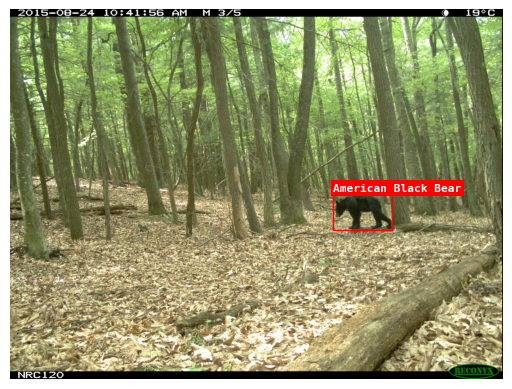

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Load the original image
image_path = 'images/8808.jpg'
image = Image.open(image_path)

# Convert the image to numpy array
image_np = np.array(image)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image_np)

# Extract bounding box coordinates
xmin, ymin, xmax, ymax = bounding_boxes[0]

# Create a Rectangle patch
rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)

text_x = xmin
text_y = ymin

ax.text(text_x, text_y, class_name, color='white', fontsize=8, fontweight='bold', fontfamily='monospace', ha='left', va='bottom', bbox=dict(facecolor='red', edgecolor='none', pad=2))

plt.axis('off')
plt.show()

### **Inference on Image with Multiple Bounding Boxes**

In [27]:
results1 = onnx_model('images/1536.jpg')


image 1/1 /mnt/batch/tasks/shared/LS_root/mounts/clusters/myinstance1/code/images/1536.jpg: 640x640 4 Wild Turkeys, 35.5ms
Speed: 2.6ms preprocess, 35.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


**Extract the Bounding Boxes and Class Name**

In [28]:
results_object = results1[0]

boxes = results_object.boxes
names = results_object.names

print(type(boxes))
print(type(names))

# class_index_tensor = boxes.cls
# class_index = int(class_index_tensor.item())

# class_name = names.get(class_index, 'Unknown')
# print(class_name)

print(names)

print("boxes\n\n\n", boxes)

<class 'ultralytics.engine.results.Boxes'>
<class 'dict'>
{0: 'Bird', 1: 'Eastern Gray Squirrel', 2: 'Eastern Chipmunk', 3: 'Woodchuck', 4: 'Wild Turkey', 5: 'White_Tailed_Deer', 6: 'Virginia Opossum', 7: 'Eastern Cottontail', 8: 'Human', 9: 'Vehicle', 10: 'Striped Skunk', 11: 'Red Fox', 12: 'Eastern Fox Squirrel', 13: 'Northern Raccoon', 14: 'Grey Fox', 15: 'Horse', 16: 'Dog', 17: 'American Crow', 18: 'Chicken', 19: 'Domestic Cat', 20: 'Coyote', 21: 'Bobcat', 22: 'American Black Bear'}
boxes


 ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 4., 4., 4.], device='cuda:0')
conf: tensor([0.9343, 0.9168, 0.8920, 0.8898], device='cuda:0')
data: tensor([[1.2002e+03, 6.6476e+02, 1.5913e+03, 9.0081e+02, 9.3430e-01, 4.0000e+00],
        [6.3867e+02, 6.6640e+02, 7.9881e+02, 7.8446e+02, 9.1681e-01, 4.0000e+00],
        [1.1920e+02, 6.2014e+02, 4.3098e+02, 8.3240e+02, 8.9202e-01, 4.0000e+00],
        [1.0204e+03, 6.7031e+02, 1.2278e+03, 8.4819e+02, 8.8982e-01, 4.0000e+0

In [29]:
for i in range(len(boxes.cls)):

    class_index_tensor = boxes.cls[i]
    class_index = int(class_index_tensor.item())

    class_name = names.get(class_index, 'Unknown')

    xmin, ymin, xmax, ymax = boxes.xyxy[i]

    print("Detected class:", class_name)
    print("Bounding box coordinates:", xmin, ymin, xmax, ymax)
    print()

Detected class: Wild Turkey
Bounding box coordinates: tensor(1200.2018, device='cuda:0') tensor(664.7598, device='cuda:0') tensor(1591.2549, device='cuda:0') tensor(900.8066, device='cuda:0')

Detected class: Wild Turkey
Bounding box coordinates: tensor(638.6728, device='cuda:0') tensor(666.4035, device='cuda:0') tensor(798.8125, device='cuda:0') tensor(784.4562, device='cuda:0')

Detected class: Wild Turkey
Bounding box coordinates: tensor(119.2043, device='cuda:0') tensor(620.1384, device='cuda:0') tensor(430.9813, device='cuda:0') tensor(832.4026, device='cuda:0')

Detected class: Wild Turkey
Bounding box coordinates: tensor(1020.3896, device='cuda:0') tensor(670.3084, device='cuda:0') tensor(1227.7753, device='cuda:0') tensor(848.1932, device='cuda:0')



**Append the BBox Co-ordinates into a List and Convert to Numpy Array**

In [31]:
import numpy as np

bounding_boxes = []

for i in range(len(boxes.cls)):
    xmin, ymin, xmax, ymax = boxes.xyxy[i].cpu().numpy()

    bounding_boxes.append([xmin, ymin, xmax, ymax])

bounding_boxes_np = np.array(bounding_boxes)

print(bounding_boxes_np)

[[     1200.2      664.76      1591.3      900.81]
 [     638.67       666.4      798.81      784.46]
 [      119.2      620.14      430.98       832.4]
 [     1020.4      670.31      1227.8      848.19]]


### **Plot the Co-Ordinates over the image**

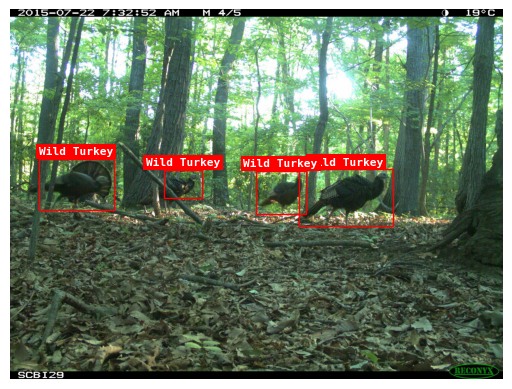

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Load the original image
image_path = 'images/1536.jpg'
image = Image.open(image_path)

# Convert the image to numpy array
image_np = np.array(image)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image_np)

# Iterate over each bounding box
for bbox in bounding_boxes:
    xmin, ymin, xmax, ymax = bbox

    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Display the class name above the bounding box with red background
    text_x = (xmin + xmax) / 2
    text_y = ymin - 10  # Adjust this value as needed for text position
    ax.text(text_x, text_y, class_name, color='white', fontsize=8, fontweight='bold', fontfamily='monospace', ha='center', va='bottom', bbox=dict(facecolor='red', edgecolor='none', pad=2))

# Show the image with bounding boxes and class name
plt.axis('off')
plt.show()